# Annotation Analysis

Finding answer to:
    - How complete is OSM data in comparison to rich place knowledge in leisure walks?
    - How selective people are considering selected POIs in lesiure walks and available POIs nearby?
    - Can a machine immitate this selective behaviour?

Aspects considered:

    1. POIs belong to classes identified in previous step
    2. OSM keys of POI
    3. lesiure walk ID as a proxy to consider individual preferences and styles


## Setup

In [1]:
# working with files
import os.path
# sys
import sys

# warning off
import warnings
# IO
import json

# requests
import requests

# dataframe 
import numpy as np
import pandas as pd
import geopandas as gpd


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# logging
from loguru import logger

# set logger level
logger.remove(0)
logger.add(sys.stderr, level="INFO")

warnings.filterwarnings("ignore")

## Loading OSM POIs and Annotations

In [2]:
with open('dataset/walkingmaps.json', 'r', encoding='utf-8') as fp:
    dataset = json.load(fp)

data_structure = {
    'record_id': [], 'record_title':[], 'record_description':[],
    'poi_title':[], 'poi_summary':[], 'latitude': [], 'longitude': []}

for record_id, record in enumerate(dataset):
    if 'pois' in record.keys() and len(record['pois']) > 0:
        for poi in record['pois']:
            data_structure['record_id'].append(record_id)
            data_structure['record_title'].append(record['title'])
            data_structure['record_description'].append(record['description'])
            data_structure['poi_title'].append(poi['title'])
            data_structure['poi_summary'].append(poi['summary'])
            data_structure['latitude'].append(poi['lat'])
            data_structure['longitude'].append(poi['lng'])

df = pd.DataFrame(data_structure)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

gdf.head()

,record_id,record_title,record_description,poi_title,poi_summary,latitude,longitude,geometry
0,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Fairhaven Surf Life Saving Club,Fairhaven is a well known surf beach. The beac...,-38.468759,144.084459,POINT (144.08446 -38.46876)
1,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Beach walk,"From Sprout Creek, Eastern View, Moggs Creek, ...",-38.468542,144.089693,POINT (144.08969 -38.46854)
2,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Rock pools,See what sort of shells and stones you can col...,-38.468459,144.092420,POINT (144.09242 -38.46846)
3,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Sand dunes,The beautiful rolling sand dunes shape the bea...,-38.468418,144.095318,POINT (144.09532 -38.46842)
4,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Painkalac Creek,The creek separates Aireys Inlet from Fairhave...,-38.468390,144.097312,POINT (144.09731 -38.46839)


In [3]:
gdf.reset_index()

,index,record_id,record_title,record_description,poi_title,poi_summary,latitude,longitude,geometry
0,0,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Fairhaven Surf Life Saving Club,Fairhaven is a well known surf beach. The beac...,-38.468759,144.084459,POINT (144.08446 -38.46876)
1,1,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Beach walk,"From Sprout Creek, Eastern View, Moggs Creek, ...",-38.468542,144.089693,POINT (144.08969 -38.46854)
2,2,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Rock pools,See what sort of shells and stones you can col...,-38.468459,144.092420,POINT (144.09242 -38.46846)
3,3,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Sand dunes,The beautiful rolling sand dunes shape the bea...,-38.468418,144.095318,POINT (144.09532 -38.46842)
4,4,1,Fairhaven to Aireys Inlet Walk created by tedm...,"Apart from the points of interested listed, he...",Painkalac Creek,The creek separates Aireys Inlet from Fairhave...,-38.468390,144.097312,POINT (144.09731 -38.46839)
...,...,...,...,...,...,...,...,...,...
4387,4387,386,Mill Park Reserve Walk created by HealthyTogether,The Mill Park Reserve walking loop is a mix of...,Lots of native flora,There are many native trees planted or protect...,-37.655068,145.054786,POINT (145.05479 -37.65507)
4388,4388,386,Mill Park Reserve Walk created by HealthyTogether,The Mill Park Reserve walking loop is a mix of...,Continue the loop or go elsewhere,There are plenty of signs to let you know wher...,-37.650457,145.057868,POINT (145.05787 -37.65046)
4389,4389,386,Mill Park Reserve Walk created by HealthyTogether,The Mill Park Reserve walking loop is a mix of...,Residential Street,This section of the walk takes you along a res...,-37.652224,145.056435,POINT (145.05643 -37.65222)
4390,4390,386,Mill Park Reserve Walk created by HealthyTogether,The Mill Park Reserve walking loop is a mix of...,The Stables Playground,This playground is huge and very cool! Hours o...,-37.655012,145.059287,POINT (145.05929 -37.65501)


In [4]:
poi_classified = pd.read_csv('outputs/dataframes/refined-topic-poi-description-classified.csv')
poi_classified.head()

,Unnamed: 0,level_0,index,topic,document,is_found,class,Count,Name,Representation,Representative_Docs,Class ID,Class,Subclass
0,0,0,0,4,Surf Life Saving Club: is a well known surf be...,False,NaN,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,0,nature,natural landmarks
1,1,1,1,4,"Beach walk: From Sprout Creek, , , to the bott...",False,NaN,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,0,nature,natural landmarks
2,2,3,3,4,Sand dunes: The beautiful rolling sand dune sh...,False,NaN,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,0,nature,natural landmarks
3,3,96,96,4,"Surf' up: A good spot to watch the surf, have ...",False,NaN,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,0,nature,natural landmarks
4,4,99,99,4,"Heading down to the beach: Follow the track, w...",False,NaN,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,0,nature,natural landmarks


In [5]:
detailed_df = pd.merge(gdf.reset_index(), poi_classified, left_on='index', right_on='index', how='inner')

In [6]:
projected_df = detailed_df[['index', 'record_id', 
       'poi_title', 'poi_summary', 'topic', 'Class', 'Class ID', 'Count',
       'Name', 'Representation', 'Representative_Docs', 'Subclass']]

projected_df['Subclass_cat'] = projected_df['Subclass'].astype('category')
projected_df.head()

,index,record_id,poi_title,poi_summary,topic,Class,Class ID,Count,Name,Representation,Representative_Docs,Subclass,Subclass_cat
0,0,1,Fairhaven Surf Life Saving Club,Fairhaven is a well known surf beach. The beac...,4,nature,0,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,natural landmarks,natural landmarks
1,1,1,Beach walk,"From Sprout Creek, Eastern View, Moggs Creek, ...",4,nature,0,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,natural landmarks,natural landmarks
2,2,1,Rock pools,See what sort of shells and stones you can col...,66,unknown,4,11,66_pools_rock_luna_rockpool,"['pools', 'rock', 'luna', 'rockpool', 'bristle...",['Expansive view and little rock pools.: The o...,unknown,unknown
3,3,1,Sand dunes,The beautiful rolling sand dunes shape the bea...,4,nature,0,129,4_beach_bay_tide_sand,"['beach', 'bay', 'tide', 'sand', 'coast', 'pat...",['Broad Tidal Flats: Bay is sow on the western...,natural landmarks,natural landmarks
4,4,1,Painkalac Creek,The creek separates Aireys Inlet from Fairhave...,25,nature,0,31,25_creek_leary_roderick_flooding,"['creek', 'leary', 'roderick', 'flooding', 'to...",['Painkalac Creek: The creek sete from and for...,natural landmarks,natural landmarks


In [7]:
projected_df['Subclass_id'] = projected_df['Subclass_cat'].cat.codes

**Question**: What's the correlation between walk id and types of POIs mentioned in the walk?

We can then answer whether walks are mainly mixed or have a dominant theme in terms of POIs

In [8]:
import association_metrics as am

categorical_df = projected_df[['record_id', 'topic', 'Subclass_id', 'Class ID']].apply(lambda x: x.astype("category"))

cramersv = am.CramersV(categorical_df) 
cramersv.fit()

,record_id,topic,Subclass_id,Class ID
record_id,1.000000,0.395258,0.452042,0.475294
topic,0.395258,1.000000,1.000000,1.000000
Subclass_id,0.452042,1.000000,1.000000,1.000000
Class ID,0.475294,1.000000,1.000000,1.000000


### NOTE
A considerable number of leisure walk has a dominant theme that can be described through the type of POI mentioned in it. High Cramér's V correlation between the categorical variables.

In [9]:
record_topics_df = categorical_df.groupby('record_id')['topic'].apply(list).reset_index(name='topics')
record_subclass_df = categorical_df.groupby('record_id')['Subclass_id'].apply(list).reset_index(name='Subclass_id')
record_class_df = categorical_df.groupby('record_id')['Class ID'].apply(list).reset_index(name='Class ID')

record_all_info_df = pd.merge(pd.merge(record_topics_df, record_subclass_df, how='inner'), record_class_df, how='inner')
record_all_info_df.head()

,record_id,topics,Subclass_id,Class ID
0,1,"[4, 4, 66, 4, 25, 66, 23, 29, 0, 28, 0]","[6, 6, 10, 6, 6, 10, 8, 1, 6, 1, 6]","[0, 0, 4, 0, 0, 4, 1, 1, 0, 1, 0]"
1,2,"[53, 31, 50, 50, 8, 31, 18, 18, 45, 12, 32, 39...","[10, 7, 4, 4, 0, 7, 0, 0, 10, 4, 0, 0, 0, 2, 7...","[4, 1, 2, 2, 2, 1, 2, 2, 4, 2, 2, 2, 2, 0, 1, ..."
2,3,"[28, 2, 39, 8, 8, 30, 51, 45, 45, 45, 0, 27, 8...","[1, 9, 0, 0, 0, 4, 0, 10, 10, 10, 6, 10, 0, 10...","[1, 3, 2, 2, 2, 2, 2, 4, 4, 4, 0, 4, 2, 4, 2, ..."
3,4,"[24, 38, 26, 41, 39, 7, 7, 38, 27, 68, 2, 0, 1...","[10, 0, 10, 0, 0, 7, 7, 0, 10, 1, 9, 6, 0, 7, ...","[4, 2, 4, 2, 2, 1, 1, 2, 4, 1, 3, 0, 2, 1, 3, ..."
4,5,"[18, 3, 4, 0, 22, 4, 4, 31, 4, 31, 0, 1, 8, 41...","[0, 3, 6, 6, 1, 6, 6, 7, 6, 7, 6, 2, 0, 0, 0, ...","[2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, ..."


In [10]:
def make_full_vector_representation(sparse_representation, dim, starter):
    res = [0 for i in range(dim)]
    for topic in sparse_representation:
        res[topic+starter] += 1
    return res

def make_full_topic_vector(row):
    row['full_rep'] = make_full_vector_representation(row['topics'], dim=70, starter=1)
    return row

record_topics_full_df = record_topics_df.apply(make_full_topic_vector, axis=1)
record_topics_full_df = record_topics_full_df[['record_id', 'full_rep']]
record_topics_full_df

,record_id,full_rep
0,1,"[0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, ..."
2,3,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 9, 0, 0, 0, 4, 0, ..."
3,4,"[0, 1, 0, 5, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, ..."
4,5,"[0, 4, 1, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
...,...,...
381,382,"[0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
382,383,"[0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
383,384,"[0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ..."
384,385,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [11]:
record_topics_full_df[[f'topic_{i}' for i in range(70)]] = record_topics_full_df['full_rep'].tolist()
record_topics_full_df[['record_id']+[f'topic_{i}' for i in range(70)]].head()

,record_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_60,topic_61,topic_62,topic_63,topic_64,topic_65,topic_66,topic_67,topic_68,topic_69
0,1,0,2,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1,2,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,0,5,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
4,5,0,4,1,0,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


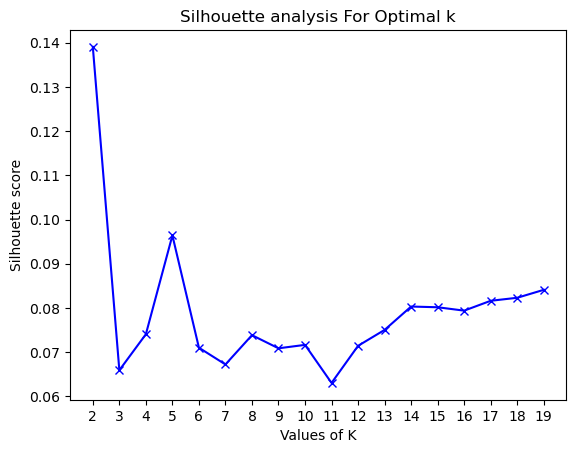

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [i for i in range(2,20)]
silhouette_avg = []
for num_clusters in range_n_clusters:
     # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1, random_state = 42)
    kmeans.fit(record_topics_full_df[[f'topic_{i}' for i in range(70)]])
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(record_topics_full_df[[f'topic_{i}' for i in range(70)]], cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')    
plt.xticks(range_n_clusters)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [13]:
optimal_n = 5
kmeans = KMeans(n_clusters=optimal_n, init='k-means++', max_iter=100, n_init=1, random_state =42)
kmeans.fit(record_topics_full_df[[f'topic_{i}' for i in range(70)]])
cluster_labels = kmeans.labels_
centroids  = kmeans.cluster_centers_
record_topics_full_df['topics_cluster_label'] = cluster_labels

In [14]:
record_all_info_df['topics_cluster_label'] = cluster_labels
record_all_info_df.head()

,record_id,topics,Subclass_id,Class ID,topics_cluster_label
0,1,"[4, 4, 66, 4, 25, 66, 23, 29, 0, 28, 0]","[6, 6, 10, 6, 6, 10, 8, 1, 9, 1, 9]","[0, 0, 4, 0, 0, 4, 1, 1, 3, 1, 3]",1
1,2,"[53, 31, 50, 50, 8, 31, 18, 18, 45, 12, 32, 39...","[5, 7, 4, 4, 0, 7, 0, 0, 10, 4, 0, 0, 0, 0, 7,...","[3, 1, 2, 2, 2, 1, 2, 2, 4, 2, 2, 2, 2, 2, 1, ...",4
2,3,"[28, 2, 39, 8, 8, 30, 51, 45, 45, 45, 0, 27, 8...","[1, 9, 0, 0, 0, 4, 0, 10, 10, 10, 9, 5, 0, 10,...","[1, 3, 2, 2, 2, 2, 2, 4, 4, 4, 3, 3, 2, 4, 2, ...",4
3,4,"[24, 38, 26, 41, 39, 7, 7, 38, 27, 68, 2, 0, 1...","[0, 0, 9, 0, 0, 7, 7, 0, 5, 1, 9, 9, 0, 7, 9, ...","[2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 3, 3, 2, 1, 3, ...",3
4,5,"[18, 3, 4, 0, 22, 4, 4, 31, 4, 31, 0, 1, 8, 41...","[0, 3, 6, 9, 1, 6, 6, 7, 6, 7, 9, 2, 0, 0, 0, ...","[2, 1, 0, 3, 1, 0, 0, 1, 0, 1, 3, 0, 2, 2, 2, ...",1


In [15]:
[str(i) for i in list(projected_df['Class ID'].unique())]

['0', '4', '1', '3', '2']

In [16]:
from collections import Counter

def find_share(list_vals):
    counted_vals = dict(Counter(list_vals))
    sum_vals = sum(counted_vals.values())
    return {str(key):round((val/sum_vals)*100, 2) for key,val in counted_vals.items()}

unique_classes = [str(i) for i in list(projected_df['Class ID'].unique())]
unique_subclasses = [str(i) for i in list(projected_df['Subclass_id'].unique())]


def analyze_classes(row):
    class_shares = find_share(row['Class ID'])
    for cid in unique_classes:
        if cid not in class_shares.keys():
            class_shares[cid] = 0
    row['class_shares'] = class_shares


    subclass_shares = find_share(row['Subclass_id'])
    for cid in unique_subclasses:
        if cid not in subclass_shares.keys():
            subclass_shares[cid] = 0
    row['subclass_shares'] = subclass_shares

    return row

record_all_analyzed = record_all_info_df.apply(analyze_classes, axis=1)
record_all_analyzed

,record_id,topics,Subclass_id,Class ID,topics_cluster_label,class_shares,subclass_shares
0,1,"[4, 4, 66, 4, 25, 66, 23, 29, 0, 28, 0]","[6, 6, 10, 6, 6, 10, 8, 1, 9, 1, 9]","[0, 0, 4, 0, 0, 4, 1, 1, 3, 1, 3]",1,"{'0': 36.36, '4': 18.18, '1': 27.27, '3': 18.1...","{'6': 36.36, '10': 18.18, '8': 9.09, '1': 18.1..."
1,2,"[53, 31, 50, 50, 8, 31, 18, 18, 45, 12, 32, 39...","[5, 7, 4, 4, 0, 7, 0, 0, 10, 4, 0, 0, 0, 0, 7,...","[3, 1, 2, 2, 2, 1, 2, 2, 4, 2, 2, 2, 2, 2, 1, ...",4,"{'3': 4.55, '1': 18.18, '2': 72.73, '4': 4.55,...","{'5': 4.55, '7': 18.18, '4': 27.27, '0': 45.45..."
2,3,"[28, 2, 39, 8, 8, 30, 51, 45, 45, 45, 0, 27, 8...","[1, 9, 0, 0, 0, 4, 0, 10, 10, 10, 9, 5, 0, 10,...","[1, 3, 2, 2, 2, 2, 2, 4, 4, 4, 3, 3, 2, 4, 2, ...",4,"{'1': 2.63, '3': 13.16, '2': 60.53, '4': 23.68...","{'1': 2.63, '9': 5.26, '0': 31.58, '4': 28.95,..."
3,4,"[24, 38, 26, 41, 39, 7, 7, 38, 27, 68, 2, 0, 1...","[0, 0, 9, 0, 0, 7, 7, 0, 5, 1, 9, 9, 0, 7, 9, ...","[2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 3, 3, 2, 1, 3, ...",3,"{'2': 26.09, '3': 39.13, '1': 34.78, '0': 0, '...","{'0': 26.09, '9': 30.43, '7': 13.04, '5': 8.7,..."
4,5,"[18, 3, 4, 0, 22, 4, 4, 31, 4, 31, 0, 1, 8, 41...","[0, 3, 6, 9, 1, 6, 6, 7, 6, 7, 9, 2, 0, 0, 0, ...","[2, 1, 0, 3, 1, 0, 0, 1, 0, 1, 3, 0, 2, 2, 2, ...",1,"{'2': 26.32, '1': 21.05, '0': 31.58, '3': 21.0...","{'0': 26.32, '3': 5.26, '6': 21.05, '9': 21.05..."
...,...,...,...,...,...,...,...
381,382,"[19, 6, 49, 17, 17, 3, 3, 15]","[9, 0, 8, 0, 0, 3, 3, 0]","[3, 2, 1, 2, 2, 1, 1, 2]",3,"{'3': 12.5, '2': 50.0, '1': 37.5, '0': 0, '4': 0}","{'9': 12.5, '0': 50.0, '8': 12.5, '3': 25.0, '..."
382,383,"[21, 0, 9, 14, 40, 14, 39, 51, 0, 48, 1]","[2, 9, 2, 2, 2, 2, 0, 0, 9, 2, 2]","[0, 3, 0, 0, 0, 0, 2, 2, 3, 0, 0]",0,"{'0': 63.64, '3': 18.18, '2': 18.18, '4': 0, '...","{'2': 63.64, '9': 18.18, '0': 18.18, '6': 0, '..."
383,384,"[16, 0, 26, 20, 1, 1, 1, 65, 11, 13]","[7, 9, 9, 9, 2, 2, 2, 2, 2, 7]","[1, 3, 3, 3, 0, 0, 0, 0, 0, 1]",0,"{'1': 20.0, '3': 30.0, '0': 50.0, '4': 0, '2': 0}","{'7': 20.0, '9': 30.0, '2': 50.0, '6': 0, '10'..."
384,385,"[28, 60, 53, 60, 60, 27, 60, 17, 51]","[1, 0, 5, 0, 0, 5, 0, 0, 0]","[1, 2, 3, 2, 2, 3, 2, 2, 2]",3,"{'1': 11.11, '2': 66.67, '3': 22.22, '0': 0, '...","{'1': 11.11, '0': 66.67, '5': 22.22, '6': 0, '..."


In [17]:
def find_all_shares(df):
    all_class_shares = list(df['class_shares'])
    all_class_shares_dict = {k:[] for k in unique_classes}
    for c_share in all_class_shares:
        for key, val in c_share.items():
            all_class_shares_dict[key].append(val)
    
    
    all_subclass_shares = list(df['subclass_shares'])
    all_subclass_shares_dict = {k:[] for k in unique_subclasses}
    for sc_share in all_subclass_shares:
        for key, val in sc_share.items():
            all_subclass_shares_dict[key].append(val)

    return all_class_shares_dict, all_subclass_shares_dict

In [18]:
agg_series = record_all_analyzed[['topics_cluster_label', 'class_shares', 'subclass_shares']].groupby(['topics_cluster_label']).apply(find_all_shares)
agg_series

topics_cluster_label
0    ({'0': [61.54, 64.29, 36.36, 33.33, 61.54, 55....
1    ({'0': [36.36, 31.58, 60.0, 53.33, 87.5, 55.56...
2    ({'0': [44.44, 13.33, 12.73, 0, 47.06, 21.43, ...
3    ({'0': [0, 11.11, 22.22, 33.33, 71.43, 0, 0, 7...
4    ({'0': [0, 0, 2.86, 0, 0, 5.0, 7.69, 4.17, 0, ...
dtype: object

In [19]:
class_mapping = {'0': 'nature', '1': 'activities', '2': 'society', '3': 'transport', '4': 'unknown'}
class_mapping_order = ['nature', 'activities', 'society', 'transport', 'unknown']

subclass_mapping = {str(cat_id):str(list(projected_df['Subclass_cat'])[idx]) for idx, cat_id in enumerate(list(projected_df['Subclass_cat'].cat.codes))}
subclass_mapping_order = ['flora and funa', 'natural landmarks',
                          'fishing to surfing', 'picnic area', 'food and beverage', 'sport complexes',
                          'human made landmarks', 'art, history and culture', 
                          'trail-path-and-canal', 'lines and stations',
                          'unknown']

def study_a_cluster(cluster_idx):
    class_distributions_df = pd.DataFrame(agg_series[cluster_idx][0]).rename(columns=class_mapping)
    class_stats = class_distributions_df[class_mapping_order].describe()

    class_distributions_df = pd.DataFrame(agg_series[cluster_idx][1]).rename(columns=subclass_mapping)
    subclass_stats = class_distributions_df[subclass_mapping_order].describe()
    return class_stats, subclass_stats

In [20]:
cluster_idx = 0  # flora and fauna/nature main theme [trail/transport + picnic/activities]
class_stats, subclass_stats = study_a_cluster(cluster_idx)
print(class_stats)
subclass_stats

           nature  activities    society  transport    unknown
count   58.000000   58.000000  58.000000  58.000000  58.000000
mean    46.441379   20.166379   6.782586  25.432931   1.177414
std     18.323796   15.990450   8.739164  14.092474   3.470865
min     11.110000    0.000000   0.000000   0.000000   0.000000
25%     33.330000    7.690000   0.000000  17.047500   0.000000
50%     45.295000   18.750000   0.000000  25.000000   0.000000
75%     61.155000   29.500000  12.500000  34.280000   0.000000
max    100.000000   60.000000  30.000000  66.670000  14.290000


,flora and funa,natural landmarks,fishing to surfing,picnic area,food and beverage,sport complexes,human made landmarks,"art, history and culture",trail-path-and-canal,lines and stations,unknown
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,38.932069,7.508448,4.378103,12.578448,0.636034,2.572414,0.183966,6.598793,23.466034,1.967069,1.177414
std,21.597562,10.413102,6.923635,12.020864,1.964453,5.078023,1.013297,8.700379,14.140773,4.555303,3.470865
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.802500,0.000000,0.000000
50%,37.500000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,23.080000,0.000000,0.000000
75%,56.605000,12.500000,7.435000,19.687500,0.000000,4.410000,0.000000,12.500000,30.000000,0.000000,0.000000
max,100.000000,45.450000,31.250000,45.450000,7.690000,23.530000,6.670000,30.000000,66.670000,20.000000,14.290000


In [21]:
cluster_idx = 1  # natural landmarks/nature as main theme + trails/transport + fishing-to-surfing/activities
class_stats, subclass_stats = study_a_cluster(cluster_idx)
print(class_stats)
subclass_stats

          nature  activities    society  transport    unknown
count  25.000000   25.000000  25.000000  25.000000  25.000000
mean   48.596000   19.594800   7.817200  20.338000   3.654800
std    21.357009   19.472903   9.234492  14.119025   5.636134
min    10.530000    0.000000   0.000000   0.000000   0.000000
25%    31.250000    0.000000   0.000000  10.000000   0.000000
50%    53.330000   14.290000   4.760000  21.050000   0.000000
75%    64.290000   30.000000  13.330000  30.000000   6.670000
max    87.500000   63.160000  30.000000  50.000000  18.180000


,flora and funa,natural landmarks,fishing to surfing,picnic area,food and beverage,sport complexes,human made landmarks,"art, history and culture",trail-path-and-canal,lines and stations,unknown
count,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,11.708400,36.886400,11.91480,5.106800,1.410400,1.163600,1.640800,6.176800,19.536800,0.800800,3.654800
std,12.814371,16.442782,15.58833,6.141018,4.250072,3.219595,3.460967,7.761152,14.349471,2.365491,5.636134
min,0.000000,10.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.520000,0.000000,0.000000
50%,9.520000,36.360000,6.67000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
75%,16.670000,45.450000,16.67000,9.520000,0.000000,0.000000,0.000000,12.500000,30.000000,0.000000,6.670000
max,45.450000,77.780000,63.16000,18.750000,16.670000,10.000000,10.000000,26.320000,50.000000,10.000000,18.180000


In [22]:
cluster_idx = 2  # all about trail, path and canals...
class_stats, subclass_stats = study_a_cluster(cluster_idx)
print(class_stats)
subclass_stats

          nature  activities    society   transport    unknown
count  51.000000   51.000000  51.000000   51.000000  51.000000
mean   17.259412   15.661176   8.398627   56.206863   2.473529
std    13.209583   13.143506  10.892077   16.885191   4.286991
min     0.000000    0.000000   0.000000   23.530000   0.000000
25%     7.290000    2.780000   0.000000   44.945000   0.000000
50%    16.670000   12.500000   5.880000   55.560000   0.000000
75%    26.970000   24.040000  11.805000   66.670000   5.570000
max    47.060000   50.000000  42.860000  100.000000  14.290000


,flora and funa,natural landmarks,fishing to surfing,picnic area,food and beverage,sport complexes,human made landmarks,"art, history and culture",trail-path-and-canal,lines and stations,unknown
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,14.255098,3.004118,3.592157,8.967255,0.438431,2.662745,0.797647,7.600980,53.785686,2.420980,2.473529
std,12.942352,5.778451,5.812985,9.767176,2.072083,5.006992,3.873678,10.370823,15.038564,6.476436,4.286991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.530000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.095000,0.000000,0.000000
50%,11.110000,0.000000,0.000000,8.330000,0.000000,0.000000,0.000000,3.700000,54.550000,0.000000,0.000000
75%,21.825000,3.185000,7.140000,12.915000,0.000000,4.450000,0.000000,10.555000,61.250000,0.000000,5.570000
max,47.060000,21.430000,22.220000,43.750000,13.330000,18.750000,26.670000,42.860000,100.000000,37.500000,14.290000


In [23]:
cluster_idx = 3  # a mixture of everything
class_stats, subclass_stats = study_a_cluster(cluster_idx)
print(class_stats)
subclass_stats

           nature  activities     society   transport     unknown
count  228.000000  228.000000  228.000000  228.000000  228.000000
mean    20.253202   30.853553   23.820263   23.863728    1.209386
std     21.486561   23.344114   23.849054   20.635576    3.657058
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000   13.842500    0.000000    6.565000    0.000000
50%     14.835000   28.080000   16.670000   20.345000    0.000000
75%     33.330000   44.440000   40.000000   37.500000    0.000000
max    100.000000  100.000000  100.000000   80.000000   16.670000


,flora and funa,natural landmarks,fishing to surfing,picnic area,food and beverage,sport complexes,human made landmarks,"art, history and culture",trail-path-and-canal,lines and stations,unknown
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,15.288202,4.965044,4.114430,14.331053,5.660000,6.748026,3.745789,20.074342,19.678684,4.185088,1.209386
std,19.913759,9.627478,9.313111,13.581746,12.967391,11.159051,8.447869,20.959225,19.188425,9.823424,3.657058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.330000,0.000000,0.000000,12.500000,0.000000,0.000000,0.000000,16.670000,14.290000,0.000000,0.000000
75%,25.000000,9.090000,0.000000,22.435000,6.610000,11.110000,0.000000,32.017500,33.330000,0.000000,0.000000
max,100.000000,62.500000,71.430000,83.330000,85.710000,60.000000,57.140000,87.500000,80.000000,60.000000,16.670000


In [24]:
cluster_idx = 4  # NOTE: more on society than activities and nature: human man-made features and art, history and culture...
class_stats, subclass_stats = study_a_cluster(cluster_idx)
print(class_stats)
subclass_stats

          nature  activities     society  transport    unknown
count  24.000000   24.000000   24.000000  24.000000  24.000000
mean    3.590417    9.080417   69.910417   8.270000   9.146667
std     4.760336    8.498959   18.962621   9.577104  14.728836
min     0.000000    0.000000   23.080000   0.000000   0.000000
25%     0.000000    0.000000   61.287500   0.000000   0.000000
50%     0.000000    8.115000   75.000000   6.695000   4.360000
75%     6.250000   15.947500   80.587500  12.500000   8.707500
max    15.380000   25.710000  100.000000  37.140000  61.540000


,flora and funa,natural landmarks,fishing to surfing,picnic area,food and beverage,sport complexes,human made landmarks,"art, history and culture",trail-path-and-canal,lines and stations,unknown
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,3.009583,0.580833,0.239583,3.493333,3.163750,2.183333,35.948750,33.961250,3.533750,4.736250,9.146667
std,4.731962,1.979260,0.814907,5.571229,5.048964,3.123377,18.911313,16.444639,5.666895,6.419966,14.728836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.270000,22.310000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.050000,30.385000,0.000000,0.000000,4.360000
75%,5.220000,0.000000,0.000000,5.880000,5.752500,5.000000,44.817500,45.625000,5.972500,7.740000,8.707500
max,15.380000,7.690000,3.120000,18.180000,15.380000,9.090000,77.140000,75.000000,21.050000,22.860000,61.540000


#### NOTE:

How to visualize the results to express the leisure walks and the compositions of POI categories...

### Types of Leisure Walks Based on POI profiles

#### Looking into number of walks/POIs in each cluster

In [25]:
def count_cluster_POIs(cluster_id):
    record_ids = list(np.where(cluster_labels == cluster_id)[0])
    walk_count = len(detailed_df[detailed_df['record_id'].isin(record_ids)]['record_description'].unique())
    poi_count = len(detailed_df[detailed_df['record_id'].isin(record_ids)]['poi_summary'])
    print('{0}: number of walks {1} - number of POIs {2}'.format(cluster_id, walk_count, poi_count))

In [26]:
for i in [0,1,2,3,4]:
    count_cluster_POIs(i)

0: number of walks 58 - number of POIs 668
1: number of walks 24 - number of POIs 282
2: number of walks 51 - number of POIs 562
3: number of walks 228 - number of POIs 2565
4: number of walks 24 - number of POIs 299


#### Note
Out of 385 walks, and 4,306 POIs

Stats shows similar results to record_id correlation to topics, subclasses and classes

    - 157 walks with single theme (~41%)
    - 228 walks with mixed theme (~59%)


#### Looking into POI and Walk Descriptions

In [27]:
detailed_df.columns

Index(['index', 'record_id', 'record_title', 'record_description', 'poi_title',
       'poi_summary', 'latitude', 'longitude', 'geometry', 'Unnamed: 0',
       'topic', 'document', 'is_found', 'class', 'Class', 'Class ID', 'Count',
       'Name', 'Representation', 'Representative_Docs', 'Subclass'],
      dtype='object')

In [28]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords.words('english')

def prune_text(text):
    filtered_words = [word for word in text.split() if word not in stopwords.words('english') and len(word) > 3]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ehsan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# word clouds of walk description/POI descriptions
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text):
    wordcloud = WordCloud(background_color="white", max_font_size=40, stopwords=stopwords.words('english')).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [30]:
def extract_cluster_description_text(cluster_id, prune=True):
    record_ids = list(np.where(cluster_labels == cluster_id)[0])
    walk_description_text = '\n'.join(list(detailed_df[detailed_df['record_id'].isin(record_ids)]['record_description'].unique()))

    POI_description_text = '\n'.join(list(detailed_df[detailed_df['record_id'].isin(record_ids)]['poi_summary']))

    if prune:
        return prune_text(walk_description_text), prune_text(POI_description_text)
    return walk_description_text, POI_description_text

### Compute TF/IDF

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 

ps = []
ws = []
for cluster_idx in [0,1,2,3,4]:
    w, p = extract_cluster_description_text(cluster_idx)
    ps.append(p)
    ws.append(w)

In [32]:
cv=CountVectorizer() 

pword_count_vector=cv.fit_transform(ps)
ptfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
ptfidf_transformer.fit(pword_count_vector)

p_df_idf = pd.DataFrame(ptfidf_transformer.idf_, index=cv.get_feature_names_out(),columns=["idf_weights"])

# sort ascending 
p_df_idf.sort_values(by=['idf_weights'])


# count matrix 
pcount_vector=cv.transform(ps) 

# tf-idf scores 
ptf_idf_vector=ptfidf_transformer.transform(pcount_vector)

feature_names = cv.get_feature_names_out() 


p0_document_vector=ptf_idf_vector[0] 
p0df = pd.DataFrame(p0_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 

In [33]:
p1_document_vector=ptf_idf_vector[1] 
p1df = pd.DataFrame(p1_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 

In [34]:
p2_document_vector=ptf_idf_vector[2] 
p2df = pd.DataFrame(p2_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 

In [35]:
p3_document_vector=ptf_idf_vector[3] 
p3df = pd.DataFrame(p3_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 

In [36]:
p4_document_vector=ptf_idf_vector[4] 
p4df = pd.DataFrame(p4_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 

In [37]:
p12df = pd.merge(p1df.reset_index().rename(columns={'index': 'word', 'tfidf':'cluster2'}),
                 p2df.reset_index().rename(columns={'index': 'word', 'tfidf':'cluster1'}), how='inner')
p012df = pd.merge(p0df.reset_index().rename(columns={'index': 'word', 'tfidf':'cluster0'}),
                 p12df, how='inner')
p34df = pd.merge(p4df.reset_index().rename(columns={'index': 'word', 'tfidf':'cluster4'}),
                 p3df.reset_index().rename(columns={'index': 'word', 'tfidf':'cluster3'}), how='inner')
p_all_df = pd.merge(p34df, p012df, how='inner')[['word', 'cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']]

In [38]:
filter_shared_words = list((p_all_df[(p_all_df[['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']]>0.05).all(axis=1)])['word'])

In [39]:
filter_stop_words = list((p_all_df[(p_all_df[['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']]<0.05).all(axis=1)])['word'])

In [40]:
filters = filter_shared_words + filter_stop_words

In [41]:
p_all_df[~p_all_df['word'].isin(filters)].to_csv('outputs/dataframes/raw_cluster_words.csv')

## Annotated OSM results

We have:

    - OSM POIs in bounding box
    - OSM POIs in buffer zone of LW POIs
    - matched/unmatched POIs 

In [9]:
api_endpoint = 'https://www.openstreetmap.org/api/0.6/{0}/{1}.json'
headers = {"Content-Type": "application/json; charset=utf-8"}

def get_info(otype, oid):
    if otype not in ['node', 'way', 'relation']:
        logger.warning('wrong type - {}'.format(otype))
    resp = requests.get(api_endpoint.format(otype, oid), headers=headers)
    return resp.json()

In [10]:
import tqdm

if os.path.isfile('dataset/annotated-osm-entities.json'):
    with open('dataset/annotations.json', 'r') as fp:
        annotations = json.load(fp)

if os.path.isfile('dataset/nominatim-geocoding.json'):
    with open('dataset/nominatim-geocoding.json') as fp:
        nominatim_output = json.load(fp)

def get_osm_pois_nearby(nominatim_keys):
    dist_threshold = 200
    osm_pois = {}
    for key in tqdm.tqdm(nominatim_keys):
        logger.debug('key: {}'.format(key))
        if os.path.isfile('dataset/osm-poi-{0}-dist-{1}-features.geojson'.format(key, dist_threshold)):
            features =  gpd.read_file('dataset/osm-poi-{0}-dist-{1}-features.geojson'.format(key, dist_threshold))
        else:
            features =  gpd.read_file('dataset/osm-poi-{0}-dist-{1}-features.geojson'.format(key, 1000))
        features = features.to_crs('EPSG:32755')
        osm_pois[key] = features
    return osm_pois

In [11]:
print(len(annotations))

4557


In [12]:
nominatim_output['0']

{'walk_id': 1,
 'title': 'Fairhaven Surf Life Saving Club',
 'summary': 'Fairhaven is a well known surf beach. The beach is patrolled during December to the Easter. The Fairhaven SLSC was established in 1958.',
 'lat': -38.46875894,
 'lng': 144.08445884,
 'osm': None}

In [13]:
len(nominatim_output)

4392

In [14]:
detailed_df[detailed_df['index']==150]

,index,record_id,record_title,record_description,poi_title,poi_summary,latitude,longitude,geometry,Unnamed: 0,...,document,is_found,class,Count,Name,Representation,Representative_Docs,Class ID,Class,Subclass
150,150,8,Victoria Park Lake created by nicg,This walk takes you along the perimeter of the...,Aquamoves,Aquamoves is an aquatic and leisure centre wit...,-36.386807,145.395534,POINT (145.39553 -36.38681),3532,...,Aquamoves: Aquamove is an aquatic and leisure ...,True,leisure fitness_centre,19,44_pool_aquamove_swimming_swim,"['pool', 'aquamove', 'swimming', 'swim', 'crec...",['Aquatic Centre: The outdoor m pool wa built ...,1,activities,sport complexes


In [15]:
annotations[0]

[{'page': 0}, {'type': 'way', 'osm_id': '1089591567'}]

In [16]:
refined_annotations = {}
for annots in annotations:
    current_key = None
    for idx, annot_details in enumerate(annots):
        if idx == 0 and 'page' in annot_details.keys():
            current_key = str(annot_details['page'])  # poi id
            refined_annotations[current_key] = []
        if current_key is not None and idx > 0:
            if 'type' in annot_details.keys() and 'osm_id' in annot_details.keys():
                if annot_details['type'] in ['node', 'way', 'relation'] and annot_details['osm_id'].isdigit():
                    refined_annotations[current_key].append([annot_details['type'], annot_details['osm_id']])
annotations = refined_annotations

In [17]:
import time

if os.path.isfile('outputs/dataframes/matced_lw_osm_all.json'):
    with open('outputs/dataframes/matced_lw_osm_all.json', 'r', encoding='utf-8') as fp:
        matched_lw_osm = json.load(fp)
    logger.info(f'previously matched OSM results are loaded - length: {len(matched_lw_osm.keys())}')
else:
    matched_lw_osm = {}

for key, value in tqdm.tqdm(nominatim_output.items()):
    matches = []
    if key in annotations and key not in matched_lw_osm.keys():
        d_row = detailed_df[detailed_df['index']==int(key)]
        for type_id in annotations[key]:
            try:
                osm_info = get_info(type_id[0], type_id[1])['elements'][0]
                matches.append({'osm': osm_info, 
                                'class': list(d_row['Class'])[0],
                                'subclass': list(d_row['Subclass'])[0], 
                                'topic': list(d_row['topic'])[0]})
                time.sleep(1)  # sleep for 1 second - polite crawling.
            except Exception as e:
                logger.warning(f'{key} - {type_id} failed due to {e}')
    elif value['osm'] is not None:
        d_row = detailed_df[detailed_df['index']==int(key)]
        matches.append({'osm': value['osm'],
                        'class': list(d_row['Class'])[0], 
                        'subclass': list(d_row['Subclass'])[0], 
                        'topic': list(d_row['topic'])[0]})
    
    if len(matches) > 0:
        matched_lw_osm[key] = matches

2024-08-31 16:33:26.188 | INFO     | __main__:<module>:6 - previously matched OSM results are loaded - length: 2434
 43%|█████████████████████████████████████████████████▍                                                                  | 1874/4392 [00:02<00:02, 1221.25it/s]2024-08-31 16:33:29.435 | WARNING  | __main__:<module>:23 - 2028 - ['way', '1009406415'] failed due to Expecting value: line 1 column 1 (char 0)
2024-08-31 16:33:30.520 | WARNING  | __main__:<module>:23 - 2032 - ['way', '1009406415'] failed due to Expecting value: line 1 column 1 (char 0)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4392/4392 [00:09<00:00, 476.04it/s]


In [18]:
len(matched_lw_osm)

2434

In [19]:
# matched_lw_osm
with open('outputs/dataframes/matced_lw_osm_all.json', 'w', encoding='utf-8') as fp:
    json.dump(matched_lw_osm, fp)
logger.info(f'matched LW to OSM fetch saved successfully - n records: {len(matched_lw_osm.keys())}')

2024-08-31 16:33:35.589 | INFO     | __main__:<module>:4 - matched LW to OSM fetch saved successfully - n records: 2434


In [20]:
from collections import Counter

tags = []
for key, vals in matched_lw_osm.items():
    for val in vals:
        osm = val['osm']
        if 'tags' in osm.keys():
            tags.extend(osm['tags'].keys())

all_tags = dict(Counter(tags))
logger.info(all_tags)

2024-08-31 16:33:42.746 | INFO     | __main__:<module>:11 - {'addr:housenumber': 179, 'addr:postcode': 146, 'addr:street': 201, 'club': 9, 'emergency': 1, 'lifeguard': 1, 'name': 1342, 'natural': 181, 'surface': 517, 'leisure': 483, 'amenity': 464, 'cuisine': 22, 'name:en': 9, 'opening_hours': 67, 'man_made': 76, 'name:zh': 18, 'seamark:type': 12, 'tourism': 220, 'website': 156, 'wheelchair': 107, 'wikidata': 170, 'wikipedia': 74, 'highway': 693, 'traffic_signals:direction': 1, 'addr:city': 60, 'building': 293, 'building:levels': 35, 'historic': 65, 'inscription': 10, 'addr:country': 52, 'addr:state': 114, 'addr:suburb': 99, 'denomination': 21, 'religion': 28, 'source': 444, 'check_date': 23, 'operator': 112, 'payment:mastercard': 2, 'payment:visa': 2, 'phone': 73, 'screen': 2, 'access': 95, 'disused:amenity': 1, 'bicycle': 282, 'foot': 313, 'memorial': 9, 'office': 11, 'artwork_type': 27, 'brewery': 3, 'email': 16, 'air_conditioning': 2, 'service_times': 2, 'contact:website': 1, 'inte

In [23]:
main_tags = []
for key,val in all_tags.items():
    if val > 20:
        logger.info(f'{key} - {val}')
        main_tags.append(key)

2024-08-31 16:36:06.929 | INFO     | __main__:<module>:4 - addr:housenumber - 179
2024-08-31 16:36:06.930 | INFO     | __main__:<module>:4 - addr:postcode - 146
2024-08-31 16:36:06.931 | INFO     | __main__:<module>:4 - addr:street - 201
2024-08-31 16:36:06.931 | INFO     | __main__:<module>:4 - name - 1342
2024-08-31 16:36:06.932 | INFO     | __main__:<module>:4 - natural - 181
2024-08-31 16:36:06.932 | INFO     | __main__:<module>:4 - surface - 517
2024-08-31 16:36:06.933 | INFO     | __main__:<module>:4 - leisure - 483
2024-08-31 16:36:06.933 | INFO     | __main__:<module>:4 - amenity - 464
2024-08-31 16:36:06.934 | INFO     | __main__:<module>:4 - cuisine - 22
2024-08-31 16:36:06.935 | INFO     | __main__:<module>:4 - opening_hours - 67
2024-08-31 16:36:06.935 | INFO     | __main__:<module>:4 - man_made - 76
2024-08-31 16:36:06.935 | INFO     | __main__:<module>:4 - tourism - 220
2024-08-31 16:36:06.936 | INFO     | __main__:<module>:4 - website - 156
2024-08-31 16:36:06.937 | INFO

In [24]:
# main_tags = ['natural', 'leisure', 'amenity', 'tourism', 'man_made', 'building', 'highway', 'bicycle', 'foot', 'surface', 'sport']

In [25]:
matches_thematic_attributes = []
for key, vals in matched_lw_osm.items():
    if key not in annotations.keys():
        continue
    for val in vals:
        added = False
        class_id = val['class']
        subclass_id = val['subclass']
        topic_id = val['topic']
        
        osm = val['osm']
        osm_key = None
        osm_val = None
        if 'class' in osm.keys() and 'type' in osm.keys():
            osm_key = osm['class']
            osm_val = osm['type']
            matches_thematic_attributes.append(
                {'class': class_id, 'subclass': subclass_id, 'topic': topic_id,
                 'osm_key': osm_key, 'osm_val': osm_val,
                        'walk': key}
                 )
            added = True
        elif 'tags' in osm.keys():
            for tag, val in osm['tags'].items():
                if tag in main_tags:
                    osm_key = tag
                    osm_val = val
                    matches_thematic_attributes.append(
                        {'class': class_id, 'subclass': subclass_id, 'topic': topic_id,
                         'osm_key': osm_key, 'osm_val': osm_val,
                        'walk': key}
                         )
                    added = True
        if not added:
                matches_thematic_attributes.append(
                    {'class': class_id, 'subclass': subclass_id, 'topic': topic_id,
                     'osm_key': osm_key, 'osm_val': osm_val,
                        'walk': key}
                     )

In [26]:
logger.debug(matches_thematic_attributes)

In [27]:
matched_attribute_df = pd.DataFrame(matches_thematic_attributes)
matched_attribute_df

,class,subclass,topic,osm_key,osm_val,walk
0,nature,natural landmarks,4,addr:housenumber,370,0
1,nature,natural landmarks,4,addr:postcode,3231,0
2,nature,natural landmarks,4,addr:street,Great Ocean Road,0
3,nature,natural landmarks,4,name,Fairhaven Surf Life Saving Club,0
4,nature,natural landmarks,4,name,Fairhaven,1
...,...,...,...,...,...,...
9779,nature,natural landmarks,0,highway,footway,4389
9780,activities,picnic area,7,leisure,playground,4390
9781,activities,picnic area,7,leisure,playground,4390
9782,activities,picnic area,7,leisure,playground,4390


In [28]:
import association_metrics as am
matched_attribute_df['osm_keyval'] = matched_attribute_df.apply(lambda row: row['osm_key']+'-'+row['osm_val'] if row['osm_val'] is not None else 
                                                                'None', axis=1)
categorical_df = matched_attribute_df[['class', 'subclass', 'topic', 'osm_key', 'osm_val', 'osm_keyval']].apply(lambda x: x.astype("category"))

cramersv = am.CramersV(categorical_df) 
cramersv.fit()

,class,subclass,topic,osm_key,osm_val,osm_keyval
class,1.000000,1.000000,0.980668,0.425637,0.680010,0.726171
subclass,1.000000,1.000000,0.988419,0.354487,0.696302,0.727785
topic,0.980668,0.988419,1.000000,0.207158,0.618601,0.640069
osm_key,0.425637,0.354487,0.207158,1.000000,0.846010,1.000000
osm_val,0.680010,0.696302,0.618601,0.846010,1.000000,1.000000
osm_keyval,0.726171,0.727785,0.640069,1.000000,1.000000,1.000000


In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [30]:
matched_attribute_df['subclass'] = matched_attribute_df.apply(lambda row: row['subclass'] if row['subclass'] != 'unknown' else 'sub:unknown', axis=1)

In [31]:
matched_attribute_df['osm_cat'] = matched_attribute_df.apply(lambda row: row['osm_key']+':'+row['osm_val'] if row['osm_key'] is not None else 'None', axis=1)
matched_attribute_df

,class,subclass,topic,osm_key,osm_val,walk,osm_keyval,osm_cat
0,nature,natural landmarks,4,addr:housenumber,370,0,addr:housenumber-370,addr:housenumber:370
1,nature,natural landmarks,4,addr:postcode,3231,0,addr:postcode-3231,addr:postcode:3231
2,nature,natural landmarks,4,addr:street,Great Ocean Road,0,addr:street-Great Ocean Road,addr:street:Great Ocean Road
3,nature,natural landmarks,4,name,Fairhaven Surf Life Saving Club,0,name-Fairhaven Surf Life Saving Club,name:Fairhaven Surf Life Saving Club
4,nature,natural landmarks,4,name,Fairhaven,1,name-Fairhaven,name:Fairhaven
...,...,...,...,...,...,...,...,...
9779,nature,natural landmarks,0,highway,footway,4389,highway-footway,highway:footway
9780,activities,picnic area,7,leisure,playground,4390,leisure-playground,leisure:playground
9781,activities,picnic area,7,leisure,playground,4390,leisure-playground,leisure:playground
9782,activities,picnic area,7,leisure,playground,4390,leisure-playground,leisure:playground


In [37]:
unique_relationships = matched_attribute_df.groupby(['class', 'subclass', 'topic', 'osm_cat']).count().reset_index()
unique_relationships = unique_relationships[['class', 'subclass', 'topic', 'osm_cat', 'walk']]
unique_relationships

,class,subclass,topic,osm_cat,walk
0,activities,fishing to surfing,22,addr:housenumber:1-3,1
1,activities,fishing to surfing,22,addr:street:Basin Boulevard,1
2,activities,fishing to surfing,22,amenity:restaurant,1
3,activities,fishing to surfing,22,amenity:yacht_club,1
4,activities,fishing to surfing,22,area:yes,2
...,...,...,...,...,...
4656,unknown,sub:unknown,66,surface:wood,1
4657,unknown,sub:unknown,66,tourism:theme_park,1
4658,unknown,sub:unknown,66,tourism:viewpoint,3
4659,unknown,sub:unknown,66,type:boundary,1


In [55]:
unique_relationships = unique_relationships[unique_relationships['walk'] >= 15]

In [56]:
classes = list(unique_relationships['class'].astype(str).unique())
subclasses = list(unique_relationships['subclass'].astype(str).unique())
topics = list(unique_relationships['topic'].astype(str).unique())
osm_categories = list(unique_relationships['osm_cat'].astype(str).unique())

labels = classes + subclasses + topics + osm_categories
# labels = subclasses + topics + osm_categories
# labels = topics + osm_categories

In [57]:
unique_rel_class_sub = unique_relationships.groupby(['class', 'subclass']).count().reset_index()
unique_rel_class_sub = unique_rel_class_sub[['class', 'subclass', 'walk']]
unique_rel_class_sub['source'] = unique_rel_class_sub.apply(lambda row: labels.index(row['class']), axis=1)
unique_rel_class_sub['target'] = unique_rel_class_sub.apply(lambda row: labels.index(row['subclass']), axis=1)

unique_rel_sub_topic = unique_relationships.groupby(['subclass', 'topic']).count().reset_index()
unique_rel_sub_topic = unique_rel_sub_topic[['subclass', 'topic', 'walk']]
unique_rel_sub_topic['source'] = unique_rel_sub_topic.apply(lambda row: labels.index(row['subclass']), axis=1)
unique_rel_sub_topic['target'] = unique_rel_sub_topic.apply(lambda row: labels.index(str(row['topic'])), axis=1)

unique_rel_topic_osm = unique_relationships.groupby(['topic', 'osm_cat']).count().reset_index()
unique_rel_topic_osm = unique_rel_topic_osm[['topic','osm_cat', 'walk']]
unique_rel_topic_osm['source'] = unique_rel_topic_osm.apply(lambda row: labels.index(str(row['topic'])), axis=1)
unique_rel_topic_osm['target'] = unique_rel_topic_osm.apply(lambda row: labels.index(row['osm_cat']), axis=1)

In [58]:
source = list(unique_rel_class_sub['source']) + list(unique_rel_sub_topic['source']) + list(unique_rel_topic_osm['source'])
target = list(unique_rel_class_sub['target']) + list(unique_rel_sub_topic['target']) + list(unique_rel_topic_osm['target'])
value = list(unique_rel_class_sub['walk']) + list(unique_rel_sub_topic['walk']) + list(unique_rel_topic_osm['walk'])

# source = list(unique_rel_sub_topic['source']) + list(unique_rel_topic_osm['source'])
# target = list(unique_rel_sub_topic['target']) + list(unique_rel_topic_osm['target'])
# value = list(unique_rel_sub_topic['walk']) + list(unique_rel_topic_osm['walk'])

# source = list(unique_rel_topic_osm['source'])
# target = list(unique_rel_topic_osm['target'])
# value = list(unique_rel_topic_osm['walk'])

### Finding Associations Between Class/Subclasses/Topics and the OSM key and Values


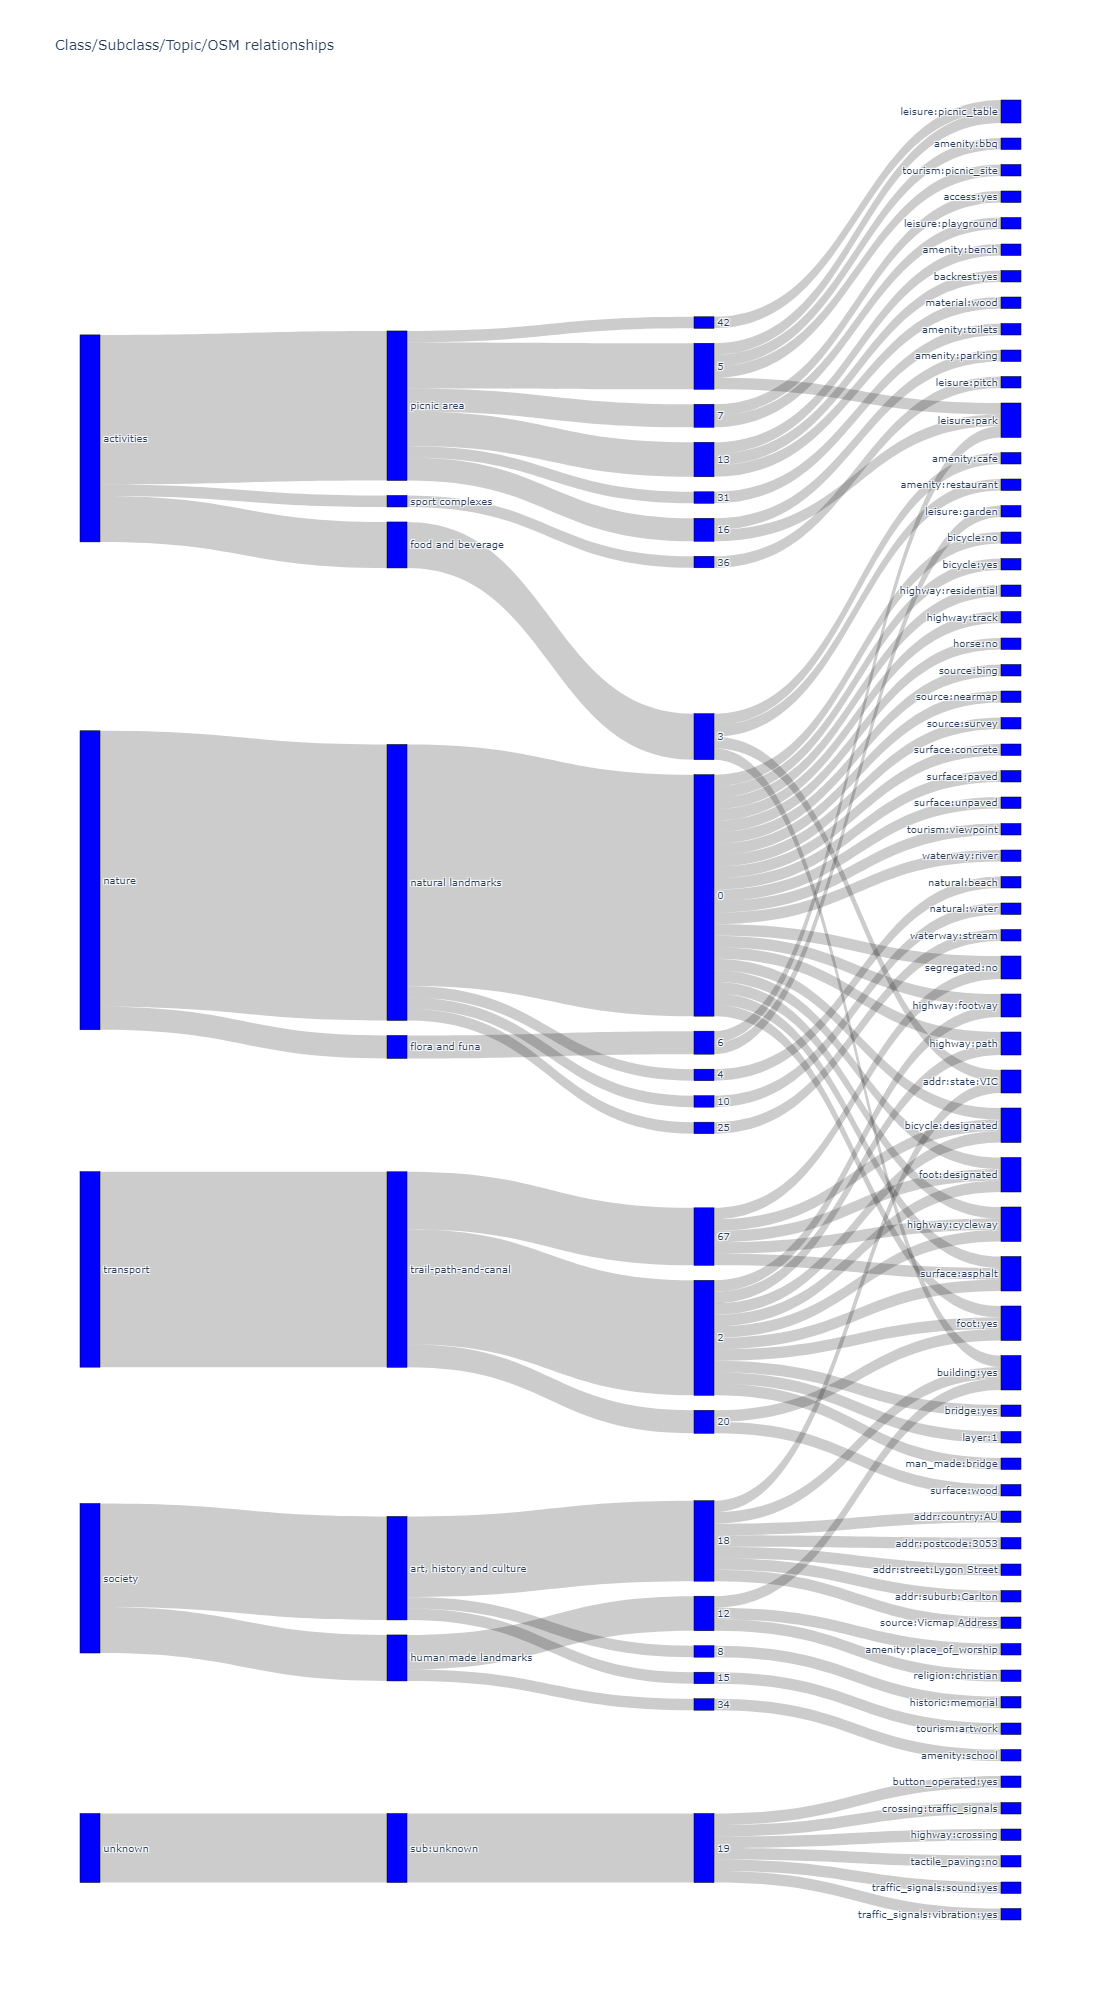

In [59]:
import plotly.graph_objects as go

# add the part that how many of each topic/class/subclass are actually matched as the figure only shows the key-vals which belong to matched results...

# how much these classes overlap by key-val (intersection/union)

filter_value_th = 1

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "blue"
    ),
    link = dict(
      # source = [s for idx, s in enumerate(source) if value[idx] > filter_value_th],
      # target = [t for idx, t in enumerate(target) if value[idx] > filter_value_th],
      # value = [v for v in value if v > filter_value_th]
        source = source,
        target = target,
        value = value
  ))])

fig.update_layout(title_text="Class/Subclass/Topic/OSM relationships", font_size=10, width=1200, height=2000)
fig.show()
fig.write_html("outputs/figure/class-subclass-topic-osm-sankeychart.html")

#### Matched or Not Matched?

Investigate what proportion of each topic/subclass/class matched with OSM results...

In [60]:
unmatched_keys = [key for key,val in annotations.items() if len(val) == 0]
logger.info(f'out {len(annotations.keys())}, {len(unmatched_keys)} POIs are not matched')

2024-08-31 16:45:01.307 | INFO     | __main__:<module>:2 - out 4386, 1994 POIs are not matched


In [61]:
matched_unmatched = []
for key, value in tqdm.tqdm(nominatim_output.items()):
    if key in annotations:
        d_row = detailed_df[detailed_df['index']==int(key)]
        record = {'status': None, 
                        'class': list(d_row['Class'])[0],
                        'subclass': list(d_row['Subclass'])[0], 
                        'topic': list(d_row['topic'])[0]}
        if key in unmatched_keys:
            record['status'] = 'not matched'
        else:
            if key not in matched_lw_osm.keys():
                continue
            if len(matched_lw_osm[key]) == 1:
                record['status'] = 'single match'
            elif len(matched_lw_osm[key]) > 1:
                record['status'] = 'multiple matches'
            else:
                logger.warning(f'something fishy happening with POI {key}')
        matched_unmatched.append(record)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4392/4392 [00:03<00:00, 1224.54it/s]


In [62]:
m_um_df = pd.DataFrame(matched_unmatched)
m_um_df.head()

,status,class,subclass,topic
0,single match,nature,natural landmarks,4
1,single match,nature,natural landmarks,4
2,not matched,unknown,unknown,66
3,not matched,nature,natural landmarks,4
4,single match,nature,natural landmarks,25


In [63]:
m_um_df['counts'] = 1

In [64]:
m_um_df['status'] = pd.Categorical(m_um_df['status'], categories=['not matched', 'single match', 'multiple matches'])
m_um_df['class'] = pd.Categorical(m_um_df['class'], categories=['nature', 'activities', 'society', 'transport', 'unknown'])
m_um_df['subclass'] = pd.Categorical(m_um_df['subclass'], categories=['flora and funa', 'natural landmarks',
                                                                      'fishing to surfing', 'picnic area', 'food and beverage', 'sport complexes',
                                                                      'human made landmarks', 'art, history and culture',
                                                                      'trail-path-and-canal', 'lines and stations',
                                                                      'unknown'
                                                                     ])


In [65]:
class_m_um_df = m_um_df.groupby(['class', 'status'])['counts'].sum().reset_index()
subclass_m_um_df = m_um_df.groupby(['subclass', 'status'])['counts'].sum().reset_index()

In [66]:
class_m_um_df['precentage'] = class_m_um_df['counts'] / class_m_um_df.groupby('class')['counts'].transform('sum')
subclass_m_um_df['precentage'] = subclass_m_um_df['counts'] / subclass_m_um_df.groupby('subclass')['counts'].transform('sum')

In [67]:
colors = sns.color_palette("hls", 3)
colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.3712, 0.33999999999999997, 0.86)]

<Axes: xlabel='class'>

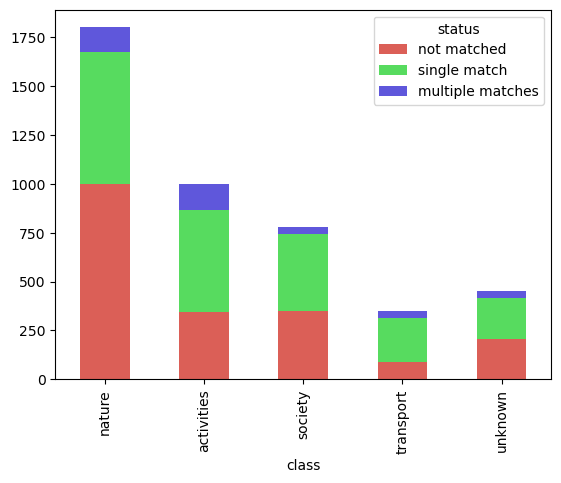

In [68]:
class_m_um_df.pivot_table(
    index = 'class', columns = 'status' , values = 'counts').plot(
    kind = 'bar', stacked = True, color=colors)

<Axes: xlabel='class'>

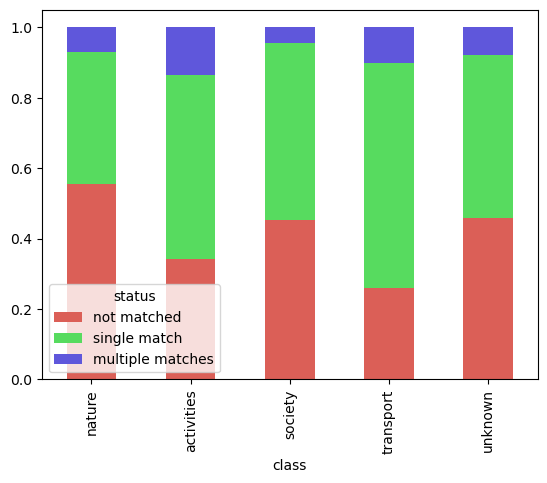

In [69]:
class_m_um_df.pivot_table(
    index = 'class', columns = 'status' , values = 'precentage').plot(
    kind = 'bar', stacked = True, color=colors)

<Axes: xlabel='subclass'>

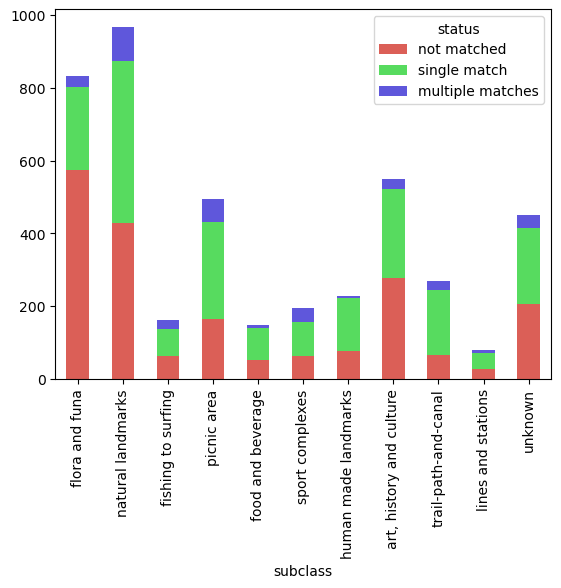

In [70]:
subclass_m_um_df.pivot_table(
    index = 'subclass', columns = 'status' , values = 'counts').plot(
    kind = 'bar', stacked = True, color=colors)

<Axes: xlabel='subclass'>

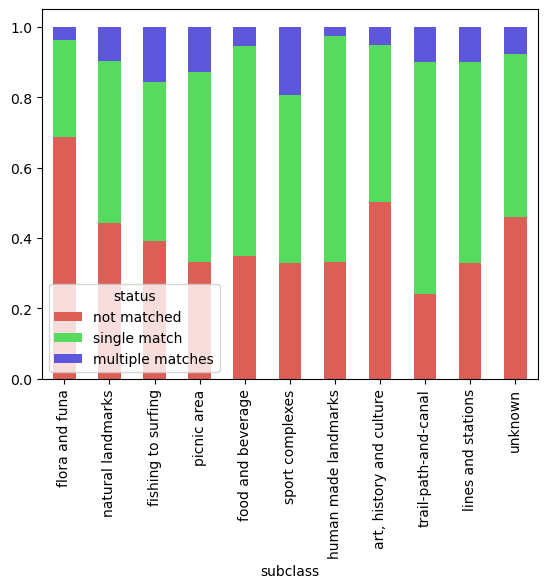

In [71]:
subclass_m_um_df.pivot_table(
    index = 'subclass', columns = 'status' , values = 'precentage').plot(
    kind = 'bar', stacked = True, color=colors)

### Discussion

Reason for a large proportion of unmatched (missing records) in OSM:

1. flora and fauna: not mapped - enough sample
2. food and beverages: mostly mapped but gets outdated as these places change in few years (COVID in between is also a reason) - also not sufficient data
3. art, history and culture: mostly not mapped or the rich information about them are not captured
4. lines and stations: ??? -- also not sufficient data to make a conclusion yet!


Reasons for multi records:
1. activities --> two reasons based on activities a compound POIs is formed (playgrounds and BBQ places) or detailed mapping: a sport complex is mapped with details (sport facility --> multi building) - ambiguity (fishing piers -- usually there are multiple of them in a neighborhood)

### Matched Records - How long is the distance?

Also consider the context - how big is the walk itself or what's the average distance between POIs in that walk to justify a threshold for finding objects of interest in Visa vs. objects of interest in nearby - then connect it categories and labels

In [138]:
annotations['16']

[['node', 7228362154], ['way', 32710391]]

In [132]:
import overpass
overpassapi = overpass.API(timeout=600)

RECORD_TEMPALTE = "{rtype}({rid})({bbox});"

def query(rtype, rid):
    query = RECORD_TEMPALTE.format(rtype=rtype, rid=rid, bbox='-41.138526,127.118885,-27.148598,161.923572')
    return overpassapi.get(query, verbosity='geom')

query(rtype='way', rid=1089591567)

{"features": [{"geometry": {"coordinates": [[144.084357, -38.468432], [144.084346, -38.468319], [144.084205, -38.468328], [144.084201, -38.46829], [144.083946, -38.468305], [144.083951, -38.468349], [144.083984, -38.468347], [144.083995, -38.468455], [144.084357, -38.468432]], "type": "LineString"}, "id": 1089591567, "properties": {"addr:housenumber": "370", "addr:postcode": "3231", "addr:street": "Great Ocean Road", "club": "surf_life_saving", "emergency": "lifeguard", "lifeguard": "base", "name": "Fairhaven Surf Life Saving Club"}, "type": "Feature"}], "type": "FeatureCollection"}

In [134]:
detailed_annotations = {}
for key, values in tqdm.tqdm(annotations.items()):
    detailed_annotations[key] = []
    for value in values:
        rtype = value[0]
        rid = value[1]
        detailed_annotations[key].append(query(rtype=rtype, rid=rid))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [05:13<00:00,  1.12it/s]


In [139]:
detailed_annotations['16']

[{"features": [{"geometry": {"coordinates": [144.966245, -37.806426], "type": "Point"}, "id": 7228362154, "properties": {"name": "Victorian Trades Hall Council", "note": "Accessibility: category 4", "office": "surveyor"}, "type": "Feature"}], "type": "FeatureCollection"},
 {"features": [{"geometry": {"coordinates": [[144.966251, -37.805978], [144.966467, -37.806002], [144.966421, -37.806265], [144.966405, -37.806264], [144.966379, -37.806411], [144.966478, -37.806422], [144.96653, -37.806128], [144.966691, -37.806146], [144.96664, -37.80644], [144.9667, -37.806447], [144.966655, -37.806709], [144.966502, -37.806692], [144.966484, -37.806793], [144.966548, -37.8068], [144.966532, -37.806895], [144.966146, -37.806852], [144.966163, -37.806758], [144.966224, -37.806764], [144.966242, -37.806663], [144.966148, -37.806653], [144.966185, -37.806445], [144.966159, -37.806442], [144.966194, -37.806241], [144.966204, -37.806242], [144.966251, -37.805978]], "type": "LineString"}, "id": 32710391,

In [136]:
with open('outputs/dataframes/detailed_annotation_results.json', 'w', encoding='utf-8') as fp:
    json.dump(detailed_annotations, fp)

In [167]:
from shapely.geometry import shape
from shapely.ops import transform


def get_geometry(record):
    return shape(record['features'][0]['geometry'])

In [165]:
rows = []
for key, record in nominatim_output.items():
    if key not in annotations:
        continue;
        
    matched = detailed_annotations[key]
    if len(matched) == 0:
        continue;

    for matched_record in matched:
        if len(matched_record['features']) == 0:
            continue;
        row = {'walk_id': record['walk_id'], 'poi_id': key,
               'poi_title': record['title'], 'poi_decscription': record['summary'],
           'lat': record['lat'], 'lng': record['lng'], 'geometry': get_geometry(matched_record)}
        rows.append(row)
logger.info(f'number of matched and annotated records: {len(rows)}')

2024-03-17 18:12:21.236 | INFO     | __main__:<module>:17 - number of matched and annotated records: 234


In [168]:
gdf = gpd.GeoDataFrame(rows, crs="EPSG:4326")
gdf_projected = gdf.to_crs("EPSG:32755")
gdf_projected.explore()

In [178]:
from pyproj import Transformer
from shapely.geometry import Point

transformer = Transformer.from_crs(4326, 32755, always_xy=True)

def compute_distance(row):
    transformed_point = transform(transformer.transform, Point(row['lng'], row['lat']))
    row['dist'] = transformed_point.distance(row['geometry'])
    return row

In [179]:
gdf_projected = gdf_projected.apply(compute_distance, axis=1)
gdf_projected

,walk_id,poi_id,poi_title,poi_decscription,lat,lng,geometry,distance,dist
0,1,0,Fairhaven Surf Life Saving Club,Fairhaven is a well known surf beach. The beac...,-38.468759,144.084459,"LINESTRING (245626.149 5738181.179, 245624.792...",37.379334,37.379334
1,1,1,Beach walk,"From Sprout Creek, Eastern View, Moggs Creek, ...",-38.468542,144.089693,"LINESTRING (244099.747 5738111.339, 244107.629...",18.282913,18.282913
2,1,6,Aireys Inlet playground and picnic ground,There is small skateboard ramp for children to...,-38.466199,144.098772,"LINESTRING (246848.218 5738495.009, 246867.434...",15.271587,15.271587
3,1,6,Aireys Inlet playground and picnic ground,There is small skateboard ramp for children to...,-38.466199,144.098772,POINT (247049.301 5738406.242),184.075325,184.075325
4,1,7,Aireys Inlet lower shops,"Pick up a coffee, newspaper or Fish and Chips!...",-38.465536,144.098801,POINT (246906.751 5738597.292),62.682241,62.682241
...,...,...,...,...,...,...,...,...,...
229,23,340,North Carlton Railway Station Neighbourhood House,A little sign to let you know that you can dro...,-37.779057,144.967281,POINT (320942.468 5816718.820),57.688138,57.688138
230,23,341,Playground,A colourful playground to let your little ones...,-37.779178,144.966266,"LINESTRING (320872.847 5816703.096, 320874.274...",21.070509,21.070509
231,23,342,"Trees, shrubs and grasses","Oh, there's lots of trees, shrubs and grasses....",-37.779188,144.966130,"LINESTRING (320877.018 5816770.574, 320873.757...",11.806637,11.806637
232,23,349,Royal Park train station,This is the train station closest to the Zoo.,-37.781334,144.951732,POINT (319676.709 5816488.362),54.577340,54.577340


<Axes: xlabel='dist', ylabel='Count'>

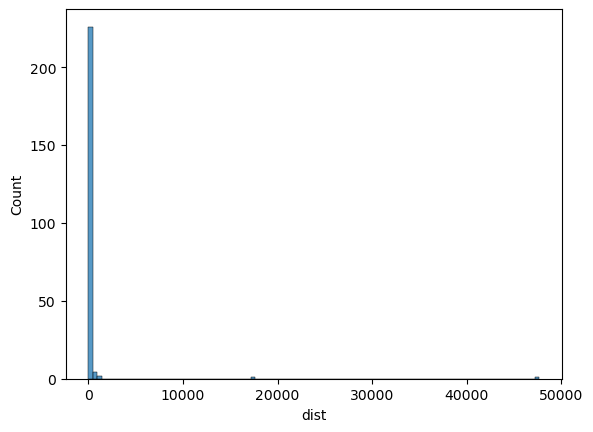

In [187]:
sns.histplot(gdf_projected.dist, bins=100)

<Axes: ylabel='Count'>

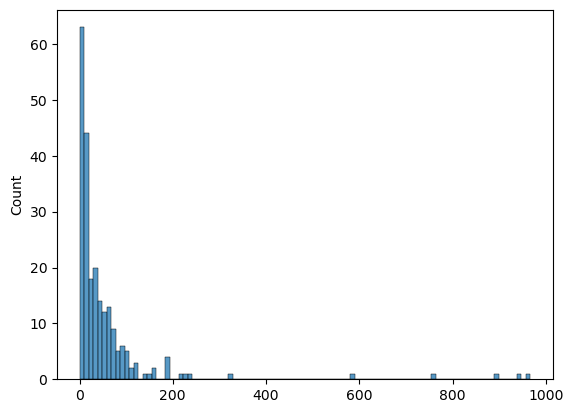

In [188]:
sns.histplot([d for d in gdf_projected.dist if d < 1000], bins=100)

<Axes: xlabel='dist', ylabel='Count'>

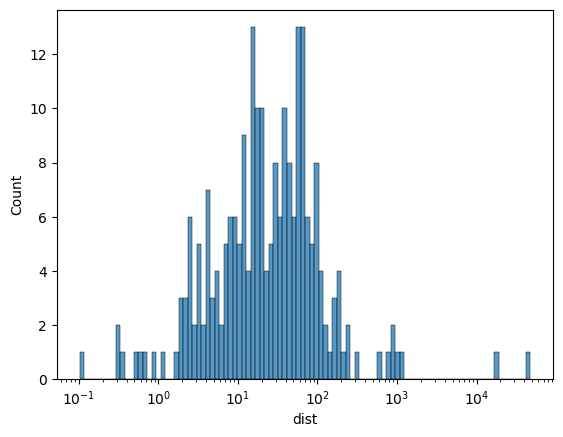

In [184]:
sns.histplot(gdf_projected.dist, log_scale=True, bins=100)

In [ ]:
gdf_projected.sort_values(['dist'], ascending=[False]).head(50)

### From OSM POIs to Making Decision For Leisure Walk

Having no prior 

Having prior information about the theme of the walk

Having prior information - a subset of POIs

In [196]:
gdf_projected.groupby(by='walk_id')['poi_id'].count()

walk_id
1     11
2     23
3     25
4     19
5     12
6     19
7      5
8     11
9      7
10     1
11     3
12     1
13    22
14     4
15    13
16    12
17     4
18    16
19    10
20     8
21     3
23     5
Name: poi_id, dtype: int64

In [199]:
focused_walks = [1,2,3,4,5,6,7,8,13,15,16,18,19]
focused_gdf = gdf_projected[gdf_projected['walk_id'].isin(focused_walks)]
focused_gdf

,walk_id,poi_id,poi_title,poi_decscription,lat,lng,geometry,distance,dist
0,1,0,Fairhaven Surf Life Saving Club,Fairhaven is a well known surf beach. The beac...,-38.468759,144.084459,"LINESTRING (245626.149 5738181.179, 245624.792...",37.379334,37.379334
1,1,1,Beach walk,"From Sprout Creek, Eastern View, Moggs Creek, ...",-38.468542,144.089693,"LINESTRING (244099.747 5738111.339, 244107.629...",18.282913,18.282913
2,1,6,Aireys Inlet playground and picnic ground,There is small skateboard ramp for children to...,-38.466199,144.098772,"LINESTRING (246848.218 5738495.009, 246867.434...",15.271587,15.271587
3,1,6,Aireys Inlet playground and picnic ground,There is small skateboard ramp for children to...,-38.466199,144.098772,POINT (247049.301 5738406.242),184.075325,184.075325
4,1,7,Aireys Inlet lower shops,"Pick up a coffee, newspaper or Fish and Chips!...",-38.465536,144.098801,POINT (246906.751 5738597.292),62.682241,62.682241
...,...,...,...,...,...,...,...,...,...
213,19,284,The track,The track appears like a shady tunnel.,-39.033178,146.307091,"LINESTRING (440255.995 5679397.972, 440249.609...",0.362170,0.362170
214,19,287,The Rocks,These rocks are like a sculpture and the colou...,-39.029542,146.307369,"LINESTRING (440375.953 5679079.592, 440301.811...",5.633505,5.633505
215,19,288,To Squeaky,"The last part of the path to Squeaky, the anti...",-39.028702,146.307507,"LINESTRING (440255.995 5679397.972, 440249.609...",3.759099,3.759099
216,19,289,Squeaky Beach,Don't forget to squeak when you walk!,-39.027415,146.307137,"LINESTRING (439616.953 5680422.768, 439655.497...",34.968112,34.968112


In [76]:
# find POIs
# two ways of doing it... bounding box? or/and 200-1000 meters nearby features?
# select all of those features and create a representation for each, then make a labelled data of imbalanced selected - not selected dataset
# then we can check what we can do with it!

In [ ]:
# create a POI list for each walk
